# Power Budget Worksheet

_An estimate of potential running time for this system._


In [1]:
from pathlib import Path
import emoji

IMAGES_PATH = Path() / "images" / "results"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print(emoji.emojize(":check_mark_button:"))

✅


### Power Budget

Average Runtime is approx. 57 seconds without modem, and approx. 78 seconds with modem.

$$
\textbf{Estimated Battery Life (100\% available)} = 
\frac{\text{Battery Capacity (mAh)} \times 1.00}{\text{Hourly Consumption (mA)}} \times (1.0 - \text{Battery Discharge Safety})
$$

$$
\textbf{Estimated Battery Life (75\% available due to LDO dropout)} = 
\frac{\text{Battery Capacity (mAh)} \times 0.75}{\text{Hourly Consumption (mA)}} \times (1.0 - \text{Battery Discharge Safety})
$$

[Battery being tested: XTAR 18650, 2600mAh, 3.7V, 9.62Wh](https://www.xtar.cc/product/xtar-18650-2600mah-battery-69.html)

__There is no data sheet for this specific battery.__

- This table contains integrated components.

* Note: These figures are updated using Power Profiler, and are not the same as the original estimates.

| Mode | Avg. Current (mA) | Max Current (mA) | Duration per Run |
| -: | -: | -: | -: |
| Deep Sleep | 4.01mA | 4.20mA | 21600 sec |
| Active (Measurement Mode) | 47.73mA | 120.52mA | 53.71 sec |
| Modem | 120.50mA | 262.21 | 31.57 sec |
| Write to SD | 45.07mA | 65.99mA | .320 sec |

- This table contains separate components with measured values using a multimeter. These will not be included in the final calculations, but are useful for reference.

| Peripheral | Voltage | Current (mA) |
| -: | -: | -: |
| DFRobot pH Sensor | 3.3V | 3.55mA |
| Grove TDS Sensor | 3.3V |	2.73mA	|
| DS18B20 Temp Sensor |	3.3V |	1.17mA |
| ADC 1 | 3.3V | 0.455mA |
| ADC 2 | 3.3V | 0.455mA |


__I have run calculations in code blocks below. Here are the results of those calculations.__

```
Now, let's calculate the total draw over time.
The total active draw over time for one run is 1.77 mAh.
The total sleep draw over time for one cycle is 24.06 mAh.
The average consumption is 4.29 mA.

The estimated "best case" battery life (accounting for 100% charge available, 20% safety margin) is,
484.31 hours, or 20.18 days.
The estimated "likely case" battery life (accounting for 75% charge available, 20% safety margin) is,
363.23 hours, or 15.13 days.

```

In [2]:
# Power Budget Calculator
# current units are in mA
import numpy as np
import matplotlib.pyplot as plt

# define power consumption in mA
deep_sleep = 4.01 # Power Profiler 2.0, 4.01 mA, ESP32 (only) deep sleep current, average
active_mode = 47.73 # Power Profiler 2.0, 47.73 mA, ESP32 (only) active mode current, average
modem_mode = 120.50 # Power Profiler 2.0, 120.50 mA, ESP32 (only) transmit mode current, average
storage_mode = 45.07 # Power Profiler 2.0, 45.07 mA, ESP32 (only) storage mode current, average

# We need to define component active times in seconds, totaled for one day
# Overall, we are doing 4 measurements per day, 4 transmissions per day, 4 deep sleep periods per day
# and 4 storage periods per day.
# Let's begin with calculating the time each component is active in one cycle.
active_mode_time = 53.71 # 60 seconds, ESP32 (only) active mode
modem_mode_time = 31.57 # 32 seconds, ESP32 (only) transmit mode, when the modem is transmitting
storage_mode_time = 0.320 # 0.320 seconds, ESP32 (only) storage mode, when the SD Card module is writing

# These are the deep sleep costs, which are not included in "active time". This is one cycle, lasting 6 hours.
# We are doing 4 deep sleep cycles per day.
deep_sleep_time = 360 * 60 # 21600 seconds, deep sleep time

# Let's print the variables
print('These components are active for "x" seconds per 1 device cycle @ "y" mA.\n',
        '\n',
        
        f'Active mode time: {active_mode_time} seconds @ {active_mode} mA\n',
        f'Transmit mode time: {modem_mode_time} seconds @ {modem_mode} mA\n',
        f'Storage mode time: {storage_mode_time} seconds @ {storage_mode} mA\n',
        f'\nThe power draw for "x" seconds per 1 deep sleep cycle @ "y" mA.\n',
        f'Deep sleep time: {deep_sleep_time} seconds ({deep_sleep_time/3600:.2f} hours) @ {deep_sleep} mA\n'
        )

# define time conversions
seconds_per_minute = 60
minutes_per_hour = 60
hours_per_day = 24

# set the battery capacity in mAh
battery_capacity = 2600

# set the battery voltage in V
battery_voltage = 3.7

# set the battery energy in Wh
# we will convert mWh to Wh, so we divide by 1000
battery_energy = battery_capacity * battery_voltage / 1000 # ~9.62 Wh, 3.7 V * 2600 mAh, 1 Wh = 1000 mWh

# set the battery safety margin
battery_safety_margin = 0.2 # 20% safety margin

# create arrays for active and sleep power consumption

power_array_active = np.array([
    active_mode,
    modem_mode,
    storage_mode,
])

power_array_sleep = np.array([
    deep_sleep,
])

def arrayprinter(arr,prec):
    np.set_printoptions(suppress=True,precision=prec)
    print(arr)


These components are active for "x" seconds per 1 device cycle @ "y" mA.
 
 Active mode time: 53.71 seconds @ 47.73 mA
 Transmit mode time: 31.57 seconds @ 120.5 mA
 Storage mode time: 0.32 seconds @ 45.07 mA
 
The power draw for "x" seconds per 1 deep sleep cycle @ "y" mA.
 Deep sleep time: 21600 seconds (6.00 hours) @ 4.01 mA



In [3]:
print("Let's verify the arrays first. First, the active draw. Then, the sleep draw.\n")
arrayprinter(power_array_active, 3)
arrayprinter(power_array_sleep, 3)

Let's verify the arrays first. First, the active draw. Then, the sleep draw.

[ 47.73 120.5   45.07]
[4.01]


In [4]:
# We need to create some time calculations to determine the power consumption over time in hours

power_array_active_time = np.array([
    power_array_active[0] * active_mode_time / (seconds_per_minute * minutes_per_hour),
    power_array_active[1] * modem_mode_time / (seconds_per_minute * minutes_per_hour),
    power_array_active[2] * storage_mode_time / (seconds_per_minute * minutes_per_hour)
])

power_array_sleep_time = np.array([
    power_array_sleep[0] * deep_sleep_time / (seconds_per_minute * minutes_per_hour),
])

power_total_active = np.sum(power_array_active_time)
power_total_sleep = np.sum(power_array_sleep_time)
print("\nNow, let's calculate the total draw.\n",
    f'The total active draw during one cyle is {power_total_active:.2f} mAh.\n',
    f'The total sleep draw is {power_total_sleep:.2f} mAh.\n',
    f'The total draw in a 6.02222 hour (one full active and deep sleep) cycle is {(power_total_active + power_total_sleep):.2f} mAh.\n')


Now, let's calculate the total draw.
 The total active draw during one cyle is 1.77 mAh.
 The total sleep draw is 24.06 mAh.
 The total draw in a 6.02222 hour (one full active and deep sleep) cycle is 25.83 mAh.



Let's verify the arrays first. First, the active draw over time. Then, the sleep draw over time.

[0.712 1.057 0.004]
[24.06]

Now, let's calculate the total draw over time.
The total active draw over time for one run is 1.77 mAh.
The total sleep draw over time for one cycle is 24.06 mAh.
The average consumption is 4.29 mA.

The estimated "best case" battery life (accounting for 100% charge available, 20% safety margin) is,
484.31 hours, or 20.18 days.
The estimated "likely case" battery life (accounting for 75% charge available, 20% safety margin) is,
363.23 hours, or 15.13 days.



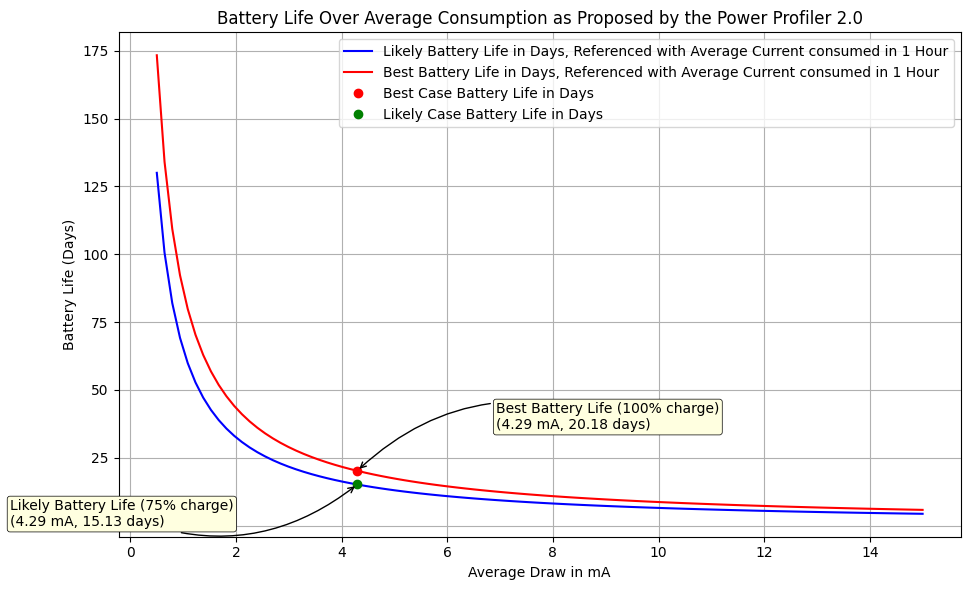

In [5]:
print("Let's verify the arrays first. First, the active draw over time. Then, the sleep draw over time.\n")
arrayprinter(power_array_active_time, 3)
arrayprinter(power_array_sleep_time, 3)
power_total_active_time = np.sum(power_array_active_time)
power_total_sleep_time = np.sum(power_array_sleep_time)
print("\nNow, let's calculate the total draw over time.")
print(f'The total active draw over time for one run is {power_total_active_time:.2f} mAh.')
print(f'The total sleep draw over time for one cycle is {power_total_sleep_time:.2f} mAh.')
average_power = (power_total_active_time + power_total_sleep_time) / (active_mode_time/(seconds_per_minute*minutes_per_hour) + deep_sleep_time/(seconds_per_minute*minutes_per_hour))
print(f'The average consumption is {(average_power):.2f} mA.\n')

# Let's compute the power budget over time in hours
# Formula: Estimated battery life = (Battery capacity in mAh) / (Total power consumption in mAh) * (1 - Safety margin)

best_case_battery_life = battery_capacity / (average_power) * (1.0 - battery_safety_margin)
likely_case_battery_life = (battery_capacity * 0.75) / (average_power) * (1.0 - battery_safety_margin)
print(f'The estimated "best case" battery life (accounting for 100% charge available, 20% safety margin) is,\n'
      f'{best_case_battery_life:.2f} hours, or {best_case_battery_life/24:.2f} days.')
# 6 hours of sleep, plus 0.0222 hours of active time (80 sec) per cycle
print(f'The estimated "likely case" battery life (accounting for 75% charge available, 20% safety margin) is,\n'
      f'{likely_case_battery_life:.2f} hours, or {likely_case_battery_life/24:.2f} days.\n')

# Let's plot the consumption over time
plt.figure(figsize=(10, 6))

x = np.linspace(0.5, 15, 100)# 100 cycles
z = ((battery_capacity)/(x) * (1.0 - battery_safety_margin))/24 * np.ones(100) # Best case battery life in days
y = ((battery_capacity*0.75)/(x) * (1.0 - battery_safety_margin))/24 * np.ones(100) # Likely case battery life in days
plt.plot(x, y, label='Likely Battery Life in Days, Referenced with Average Current consumed in 1 Hour', color='blue')
plt.plot(x, z, label='Best Battery Life in Days, Referenced with Average Current consumed in 1 Hour',color='red')
plt.plot(average_power, best_case_battery_life/24, 'ro', label='Best Case Battery Life in Days')
plt.plot(average_power, likely_case_battery_life/24, 'go', label='Likely Case Battery Life in Days')
plt.xlabel('Average Draw in mA')
plt.ylabel('Battery Life (Days)')

# Annotations
plt.annotate(
    f'Likely Battery Life (75% charge)\n({average_power:.2f} mA, {likely_case_battery_life/24:.2f} days)',
    xy=(average_power, likely_case_battery_life/24),
    xytext=(-250, -30),  # Offset
    textcoords='offset points',
    fontsize=10,
    color='black',
    bbox=dict(boxstyle="round,pad=0.2", fc="lightyellow", ec="black", lw=0.5),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3")
)

plt.annotate(
    f'Best Battery Life (100% charge)\n({average_power:.2f} mA, {best_case_battery_life/24:.2f} days)',
    xy=(average_power, best_case_battery_life/24),
    xytext=(100, 30),  # Offset
    textcoords='offset points',
    fontsize=10,
    color='black',
    bbox=dict(boxstyle="round,pad=0.2", fc="lightyellow", ec="black", lw=0.5),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3")
)

plt.title('Battery Life Over Average Consumption as Proposed by the Power Profiler 2.0')
plt.legend()
plt.grid()
save_fig('theoretical_battery_life_over_average_consumption', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

## Screenshots of the Power Profiler analysis

- <span style='color:Blue'> Initialization </span>

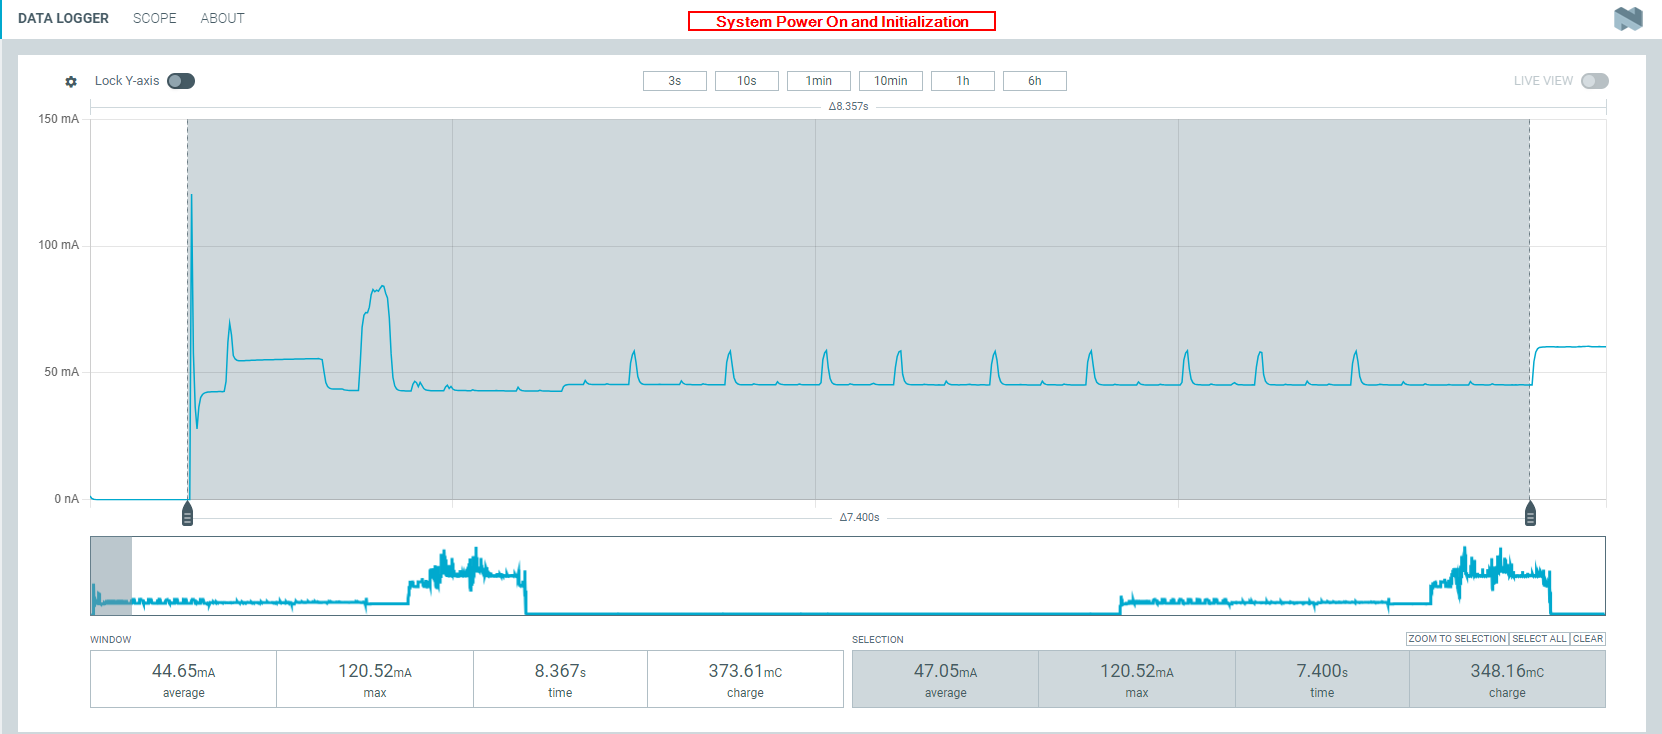

---

- <span style='color:Blue'> Temperature Sensor </span>

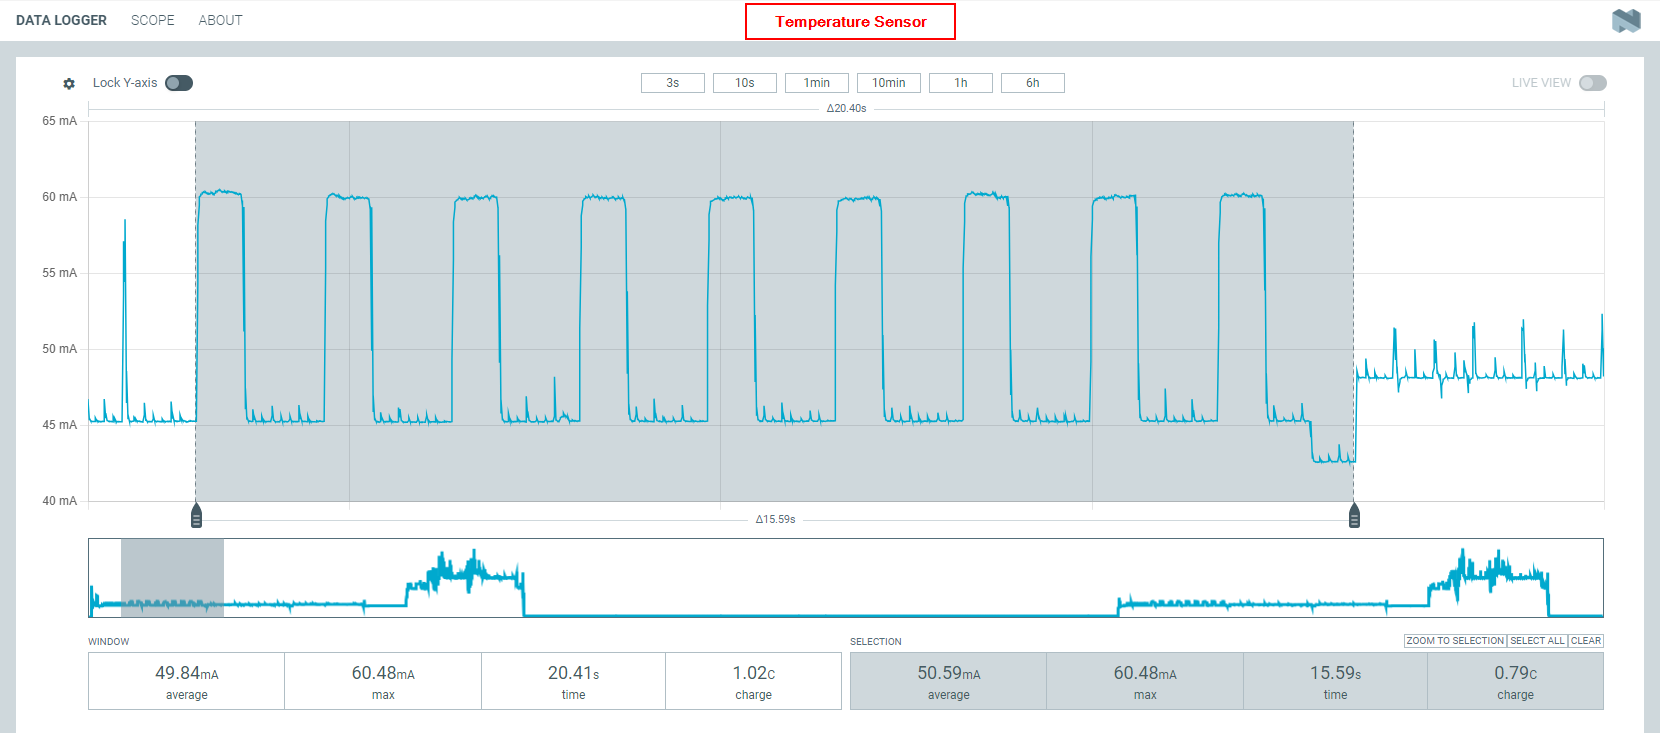

---

- <span style='Blue'> TDS Sensor </span>

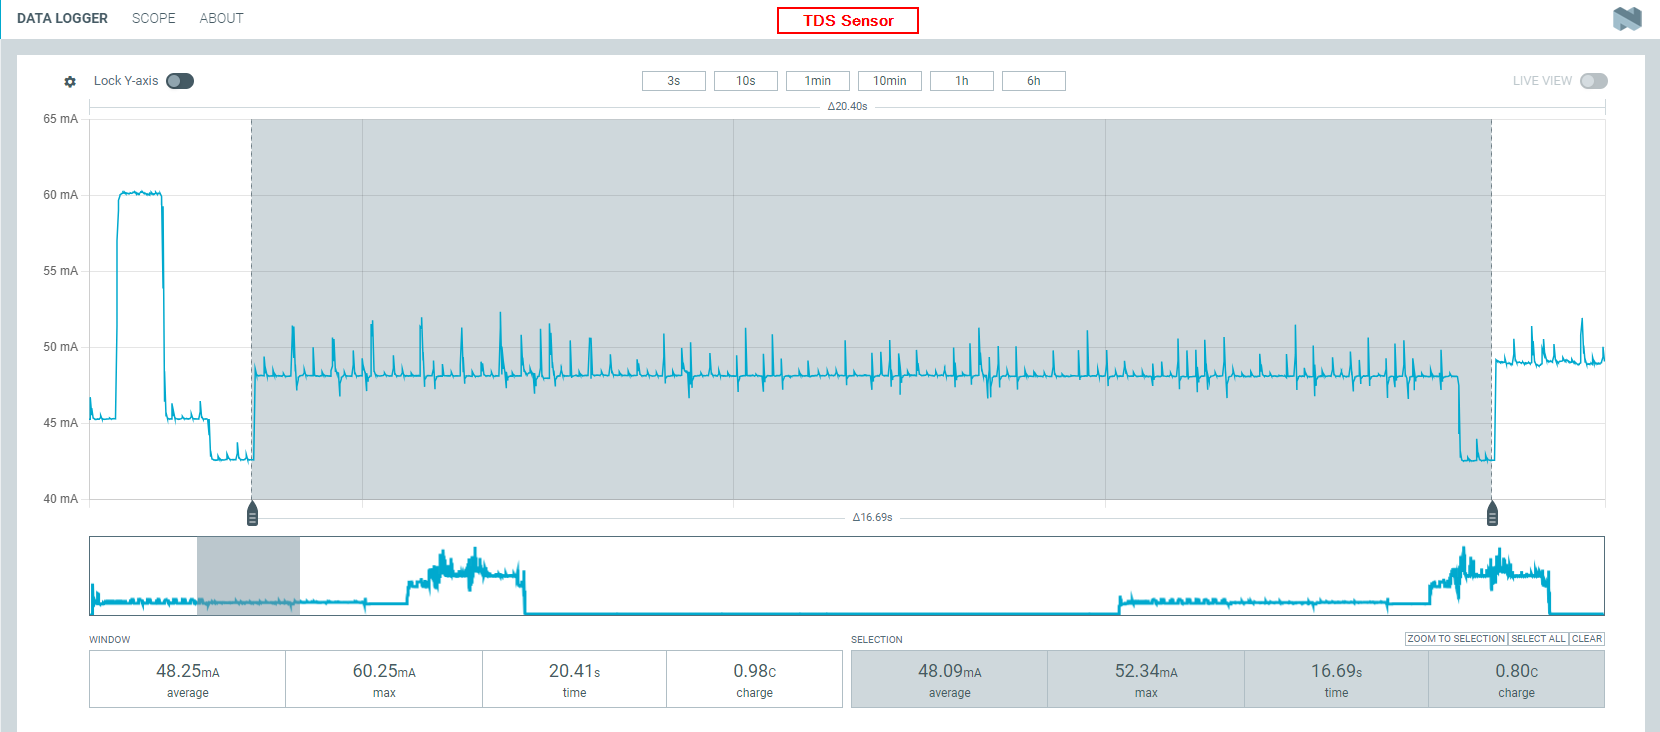

---

- <span style='color:Blue'> pH Sensor </span>

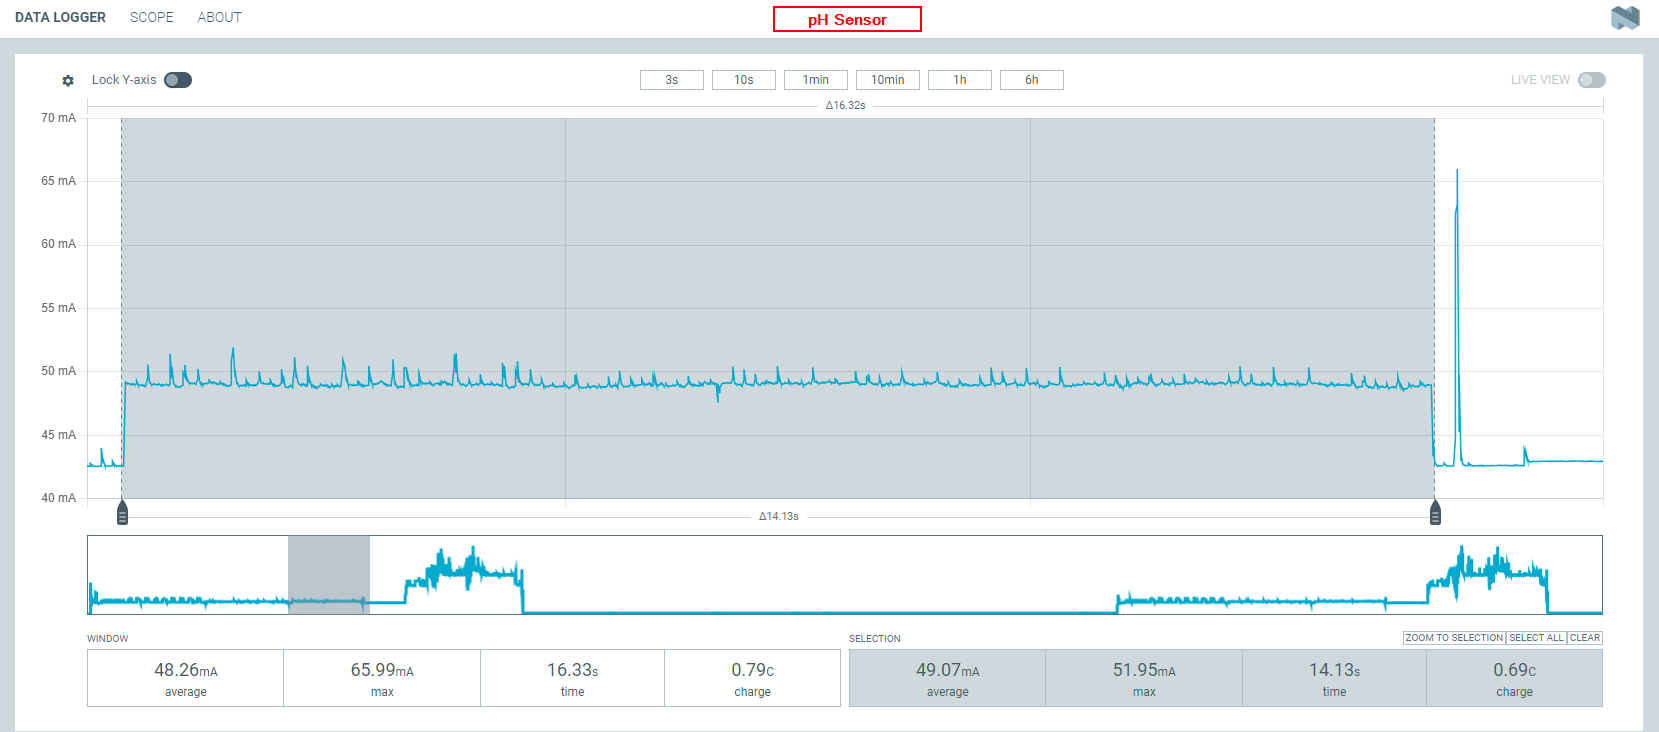

---

- <span style='color:Blue'> SD Card Write </span>

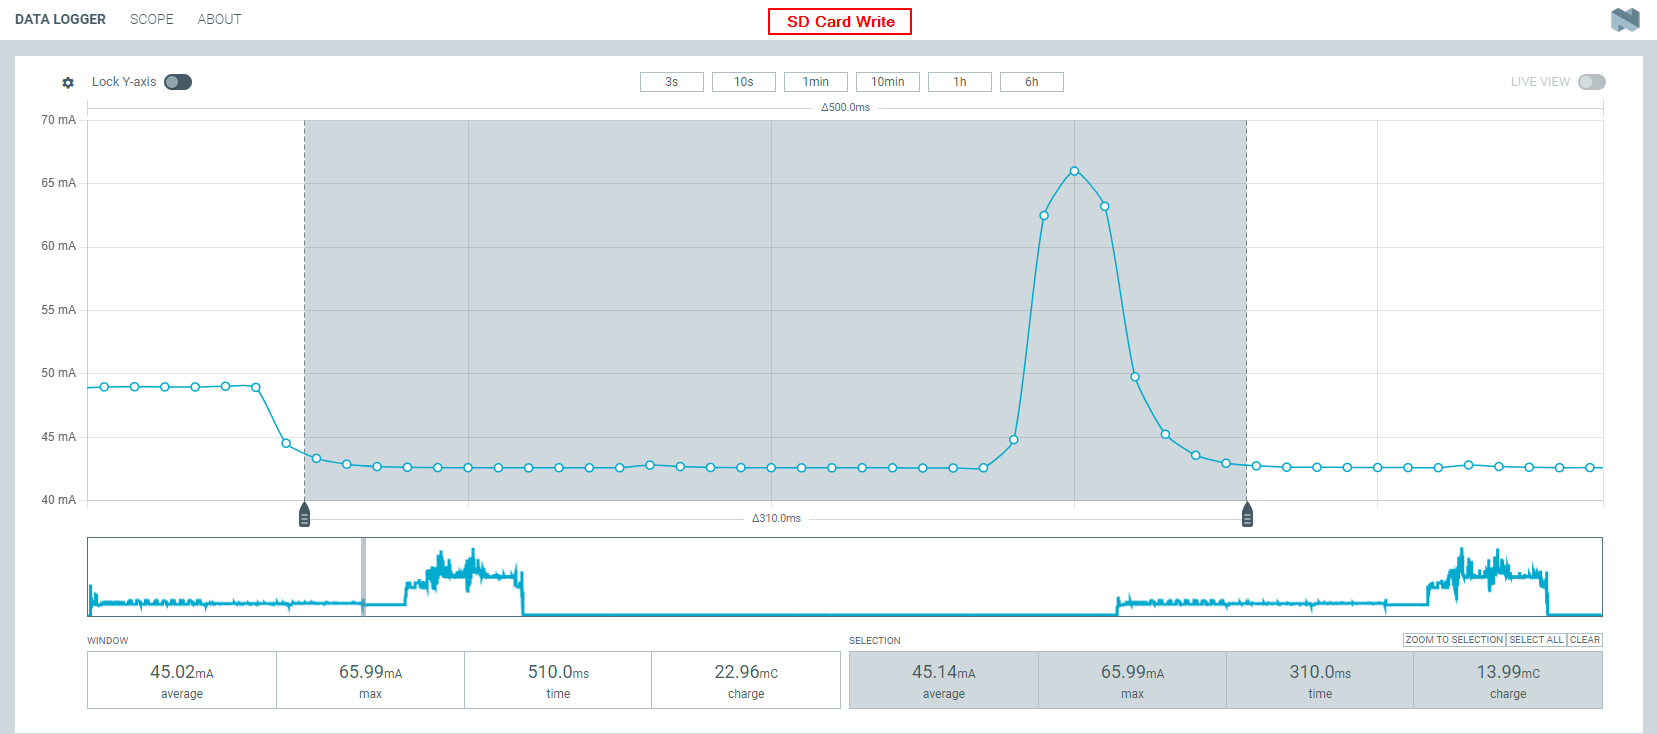

---

- <span style='color:Blue'> Modem </span>

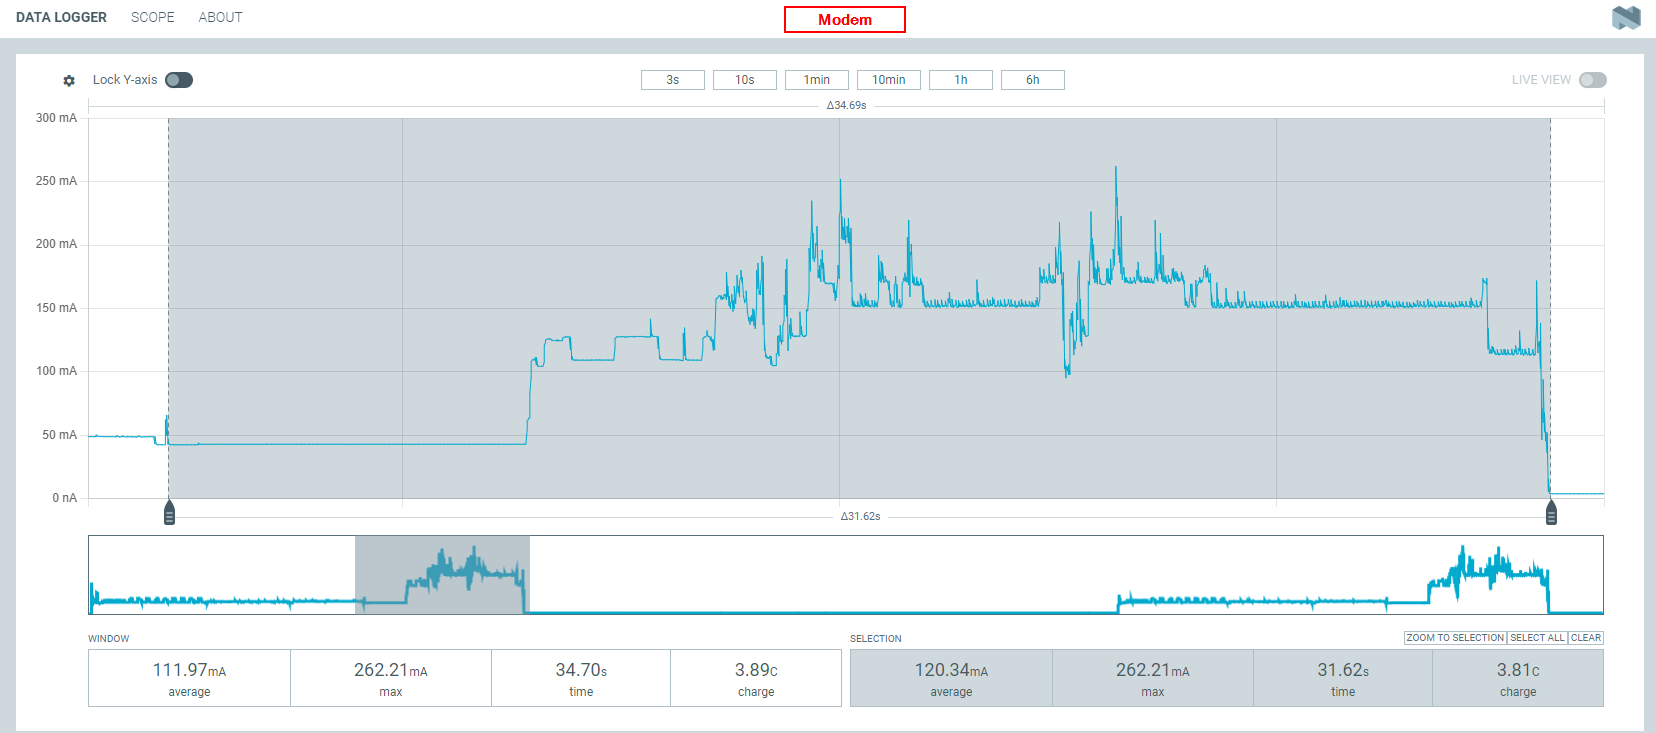

---

- <span style='color:Blue'> Deep Sleep </span> (*Note: This is an abbreviated version of the full sleep cycle, which is 6 hours.*)  

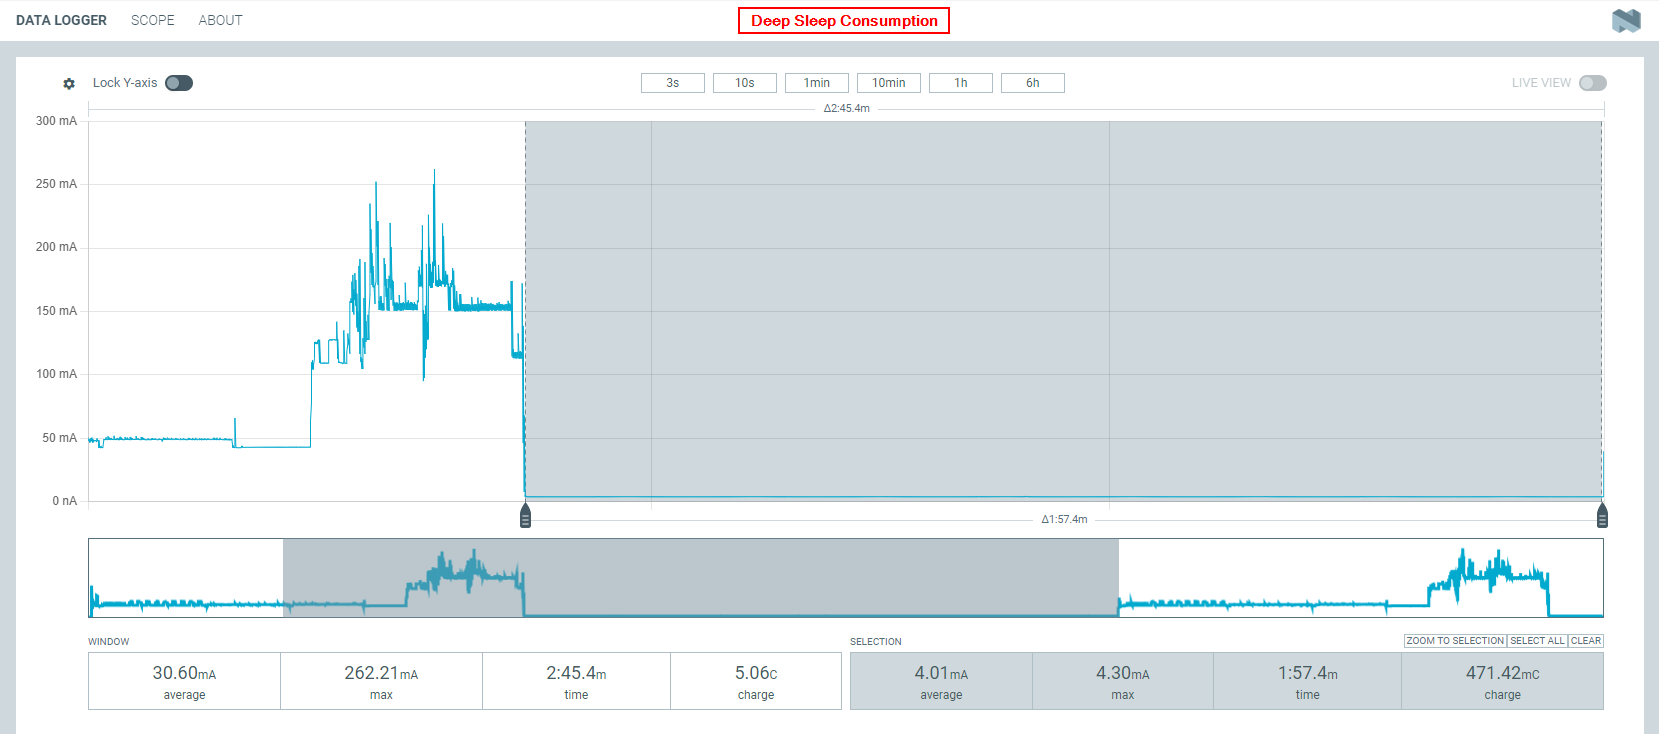

---

- <span style='color:Blue'> All Phases Combined </span>

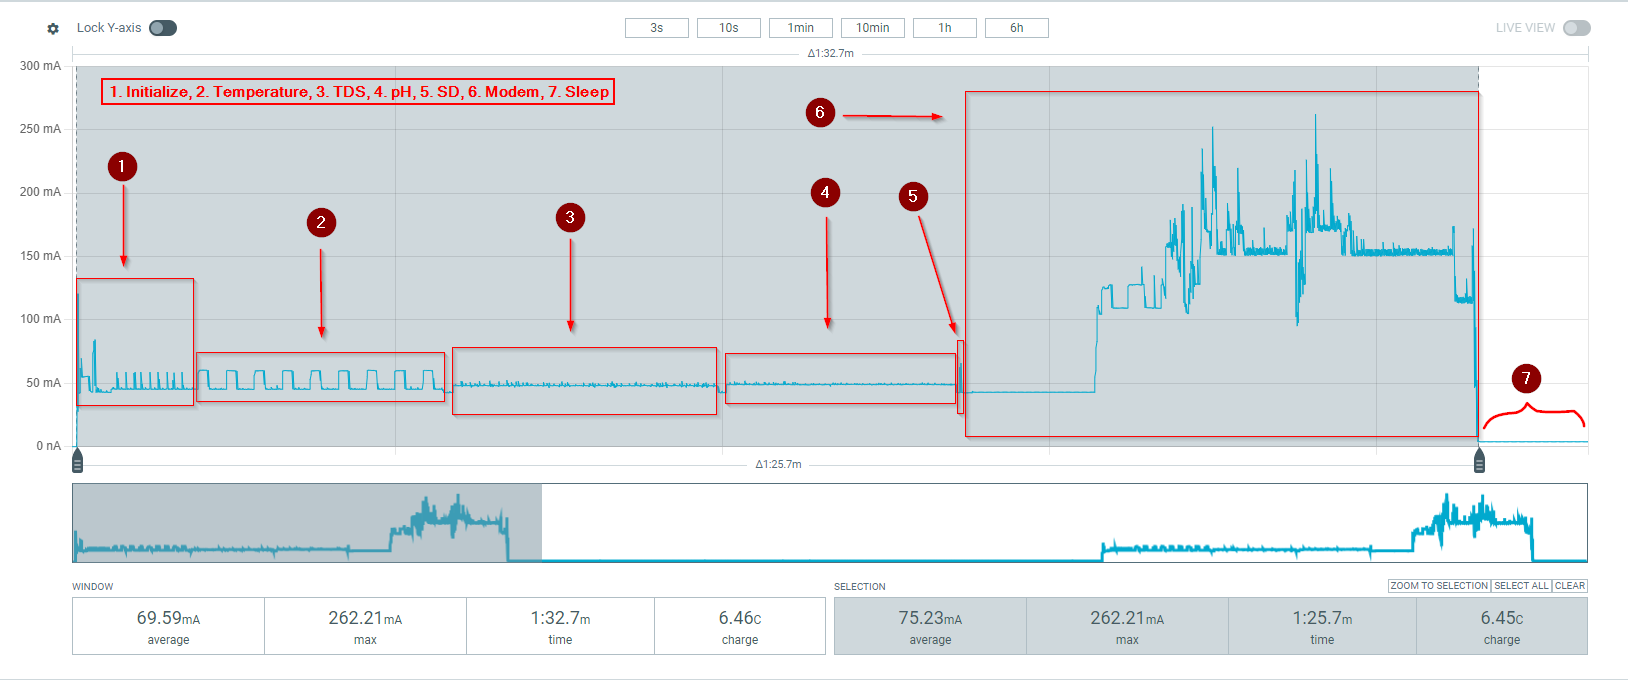

# REVIEW: Test2 Results

**--** _Compare the results of the Power Profiler analysis with Test 2 results._ **--**

**_Post Test2 Analysis_**

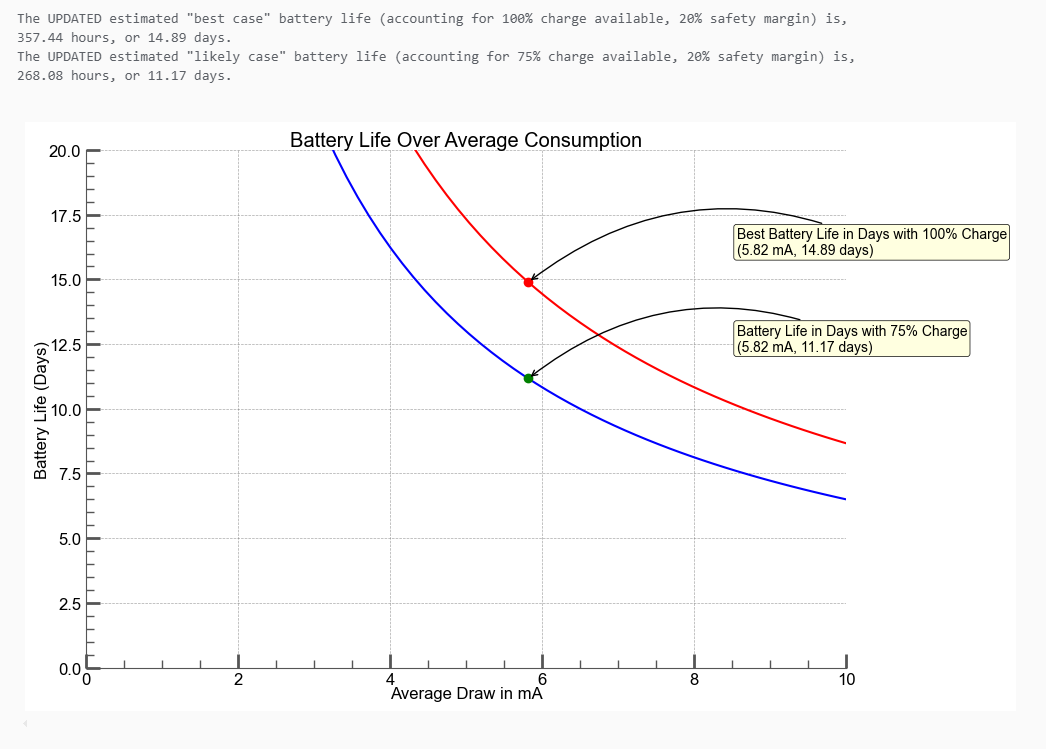